In [1]:
import os
import numpy as np
import json
from PIL import Image
import IPython
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy
from scipy.spatial import distance
from scipy.linalg import norm
from tqdm.notebook import tqdm

In [2]:
user_profile = os.environ['HOME']

# set the path to the downloaded data: 
data_path = '%s/data/EE148/RedLights2011_Medium' % user_profile

# get sorted list of files: 
file_names = sorted(os.listdir(data_path)) 

# remove any non-JPEG files: 
file_names = [f for f in file_names if '.jpg' in f] 

In [3]:
def get_ref_red_lights():
    """Get some reference images of red lights from the first image."""
    coords_dict = {
        0: [[154, 316, 171, 323], [180, 67, 205, 79], [192, 419, 207, 428]],
        1: [[175, 322, 197, 332], [215, 44, 245, 59], [222, 400, 245, 410]],
        2: [[232, 121, 255, 129], [199, 278, 219, 292], [202, 335, 220, 342], [243, 414, 265, 423]],
        9: [[13, 122, 85, 174], [25, 320, 94, 350], [174, 600, 241, 629]]
    }
    ref = []
    for i in coords_dict:
        I = Image.open(os.path.join(data_path,file_names[i]))
        I = np.asarray(I)
        for coords_list in coords_dict[i]:
            tl_row, tl_col, br_row, br_col = top_row, left_col, bot_row, right_col = coords_list
            obj = I[top_row:bot_row, left_col:right_col, :]
            show_img(obj, [])
            ref.append(obj)
    return ref

In [6]:
def detect_red_light(I):
    '''
    This function takes a numpy array <I> and returns a list <bounding_boxes>.
    The list <bounding_boxes> should have one element for each red light in the 
    image. Each element of <bounding_boxes> should itself be a list, containing 
    four integers that specify a bounding box: the row and column index of the 
    top left corner and the row and column index of the bottom right corner (in
    that order). See the code below for an example.
    
    Note that PIL loads images in RGB order, so:
    I[:,:,0] is the red channel
    I[:,:,1] is the green channel
    I[:,:,2] is the blue channel
    '''
    
    
    bounding_boxes_rgb = [] # This should be a list of lists, each of length 4. See format example below.
    
    '''
    BEGIN YOUR CODE
    '''
    dists_rgb = []
    dists_tb = []
    for ref in tqdm(ref_list):
        ref_height, ref_width, _ = ref.shape
        box_height = ref_height
        box_width = ref_width
        (n_rows,n_cols,n_channels) = np.shape(I)
        for i in range(n_rows - box_height):
            for j in range(n_cols - box_width):
                tl_row = i
                br_row = i + box_height
                tl_col = j
                br_col = j + box_width
                test_box = I[tl_row:br_row, tl_col:br_col, :]
                test_box_max = np.max(test_box)
                test_box_min = np.min(test_box)
                if test_box_max < 150 or test_box_min > 100:
                    continue
                dist_rgb = norm(ref - test_box)
                dists_rgb.append(dist_rgb)
                
                if dist_rgb < 1000:
                    bounding_boxes_rgb.append([tl_row,tl_col,br_row,br_col])
                if dist_rgb < 1500:
                    test_box_mean = np.mean(test_box)
                    test_box_std = np.std(test_box)
                    if test_box_max > 150 and test_box_max > test_box_mean + test_box_std*2:
                        if tl_row + (br_col - tl_col)*2 < br_row:
                            a = I[tl_row:tl_row + (br_col - tl_col), tl_col:br_col, :]
                            b = I[tl_row + (br_col - tl_col):tl_row + (br_col - tl_col)*2, 
                                  tl_col:br_col, :]
                            dist_tb = norm(a - b)
                            dists_tb.append(dist_tb)
                            if dist_tb > 7000:
                                bounding_boxes_rgb.append([tl_row,tl_col,br_row,br_col])
                        else:
                            bounding_boxes_rgb.append([tl_row,tl_col,br_row,br_col])
    print(len(bounding_boxes_rgb))
    plt.hist(dists_rgb)
    plt.show()
    
    if dists_tb is not None:
        plt.hist(dists_tb)
        plt.show()
    '''
    END YOUR CODE
    '''
    
    for i in range(len(bounding_boxes_rgb)):
        assert len(bounding_boxes_rgb[i]) == 4
    
    return bounding_boxes_rgb

In [7]:
def show_img(I, rect_list):
    # Create figure and axes
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    # Display the image
    ax.imshow(I)
    for rect in rect_list:
        tl_row, tl_col, br_row, br_col = rect
        # Create a Rectangle patch
        rect = patches.Rectangle((tl_col-1, tl_row-1), br_col-tl_col, br_row-tl_row,
                                 linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()

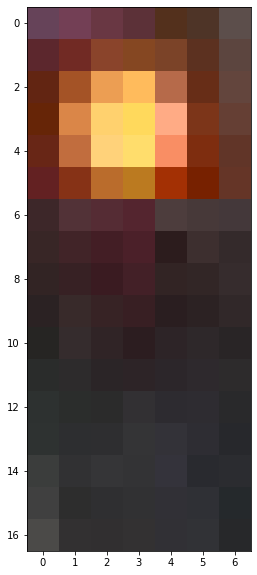

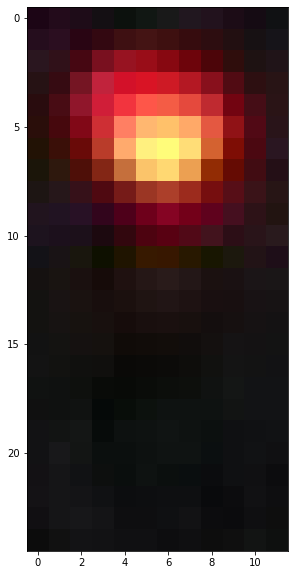

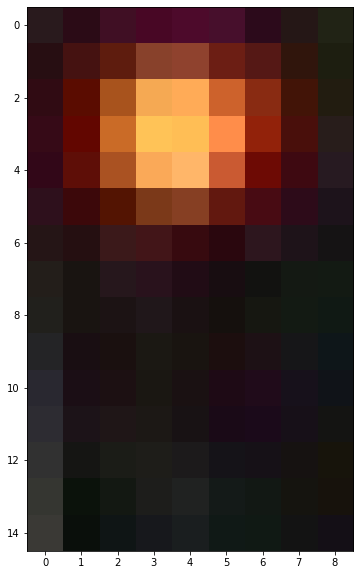

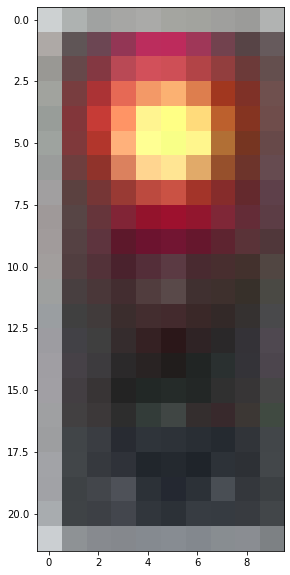

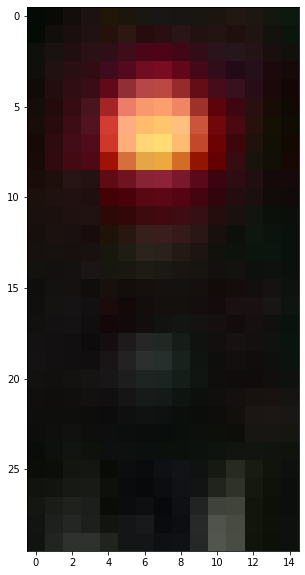

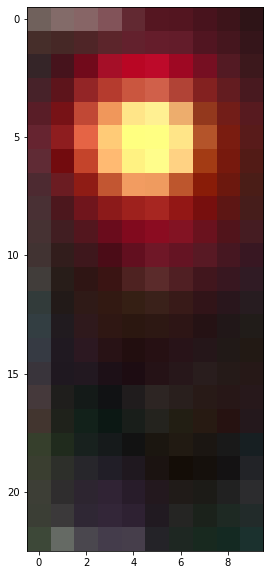

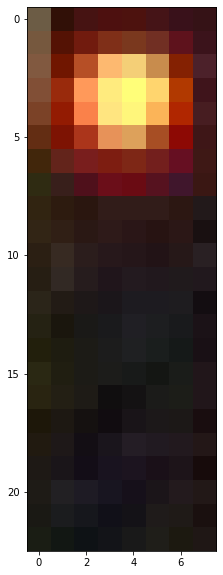

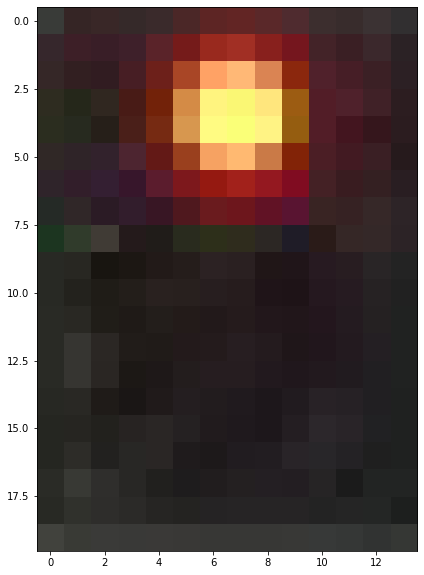

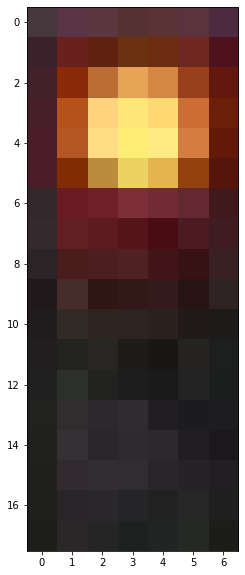

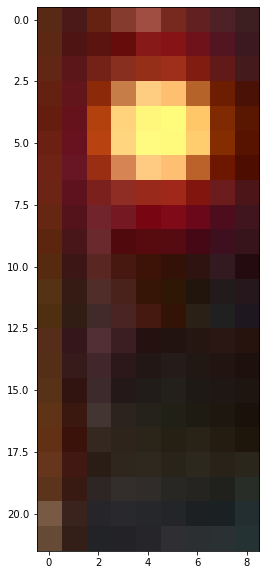

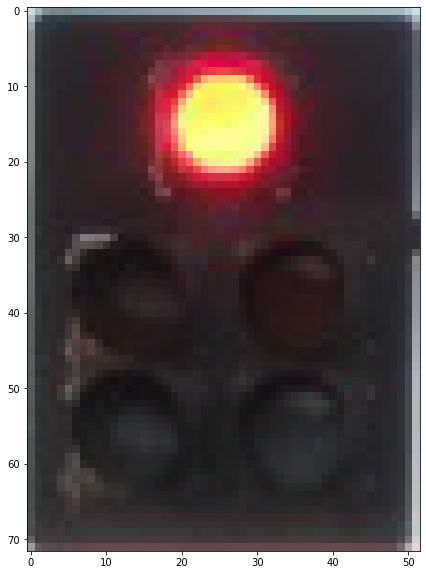

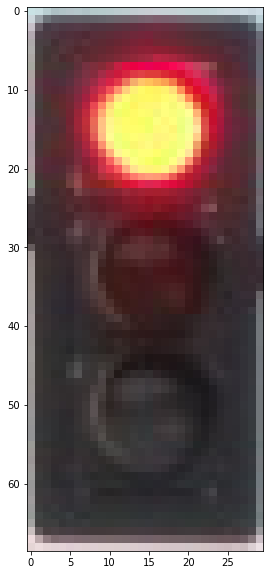

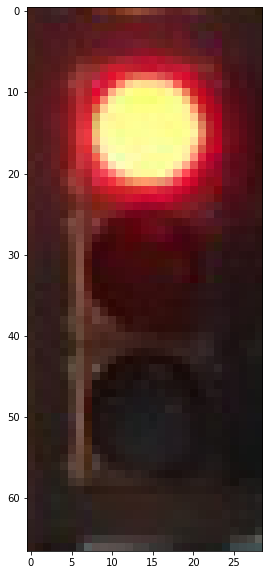

In [8]:
ref_list = get_ref_red_lights()

Images:   0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

5


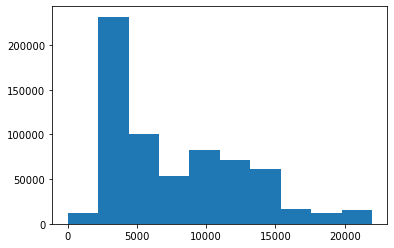

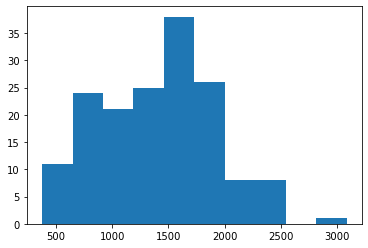

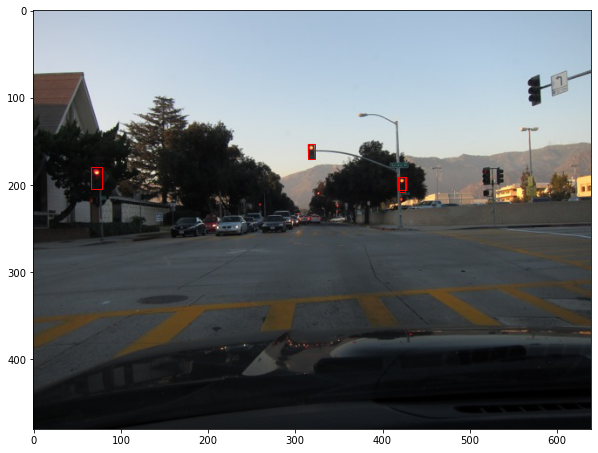

  0%|          | 0/13 [00:00<?, ?it/s]

4


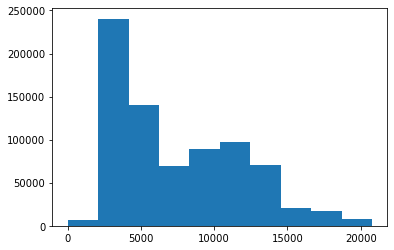

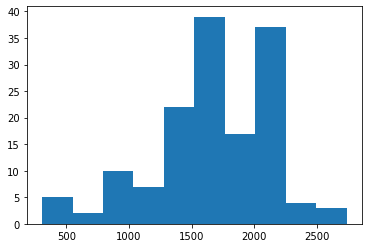

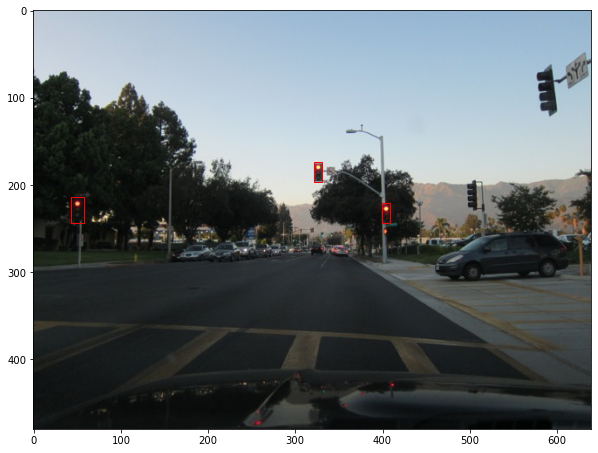

pass


  0%|          | 0/13 [00:00<?, ?it/s]

0


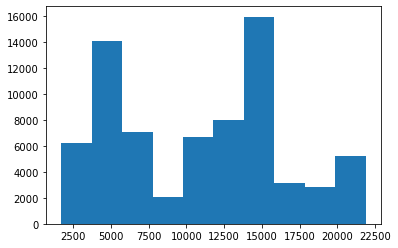

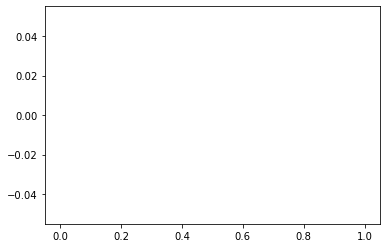

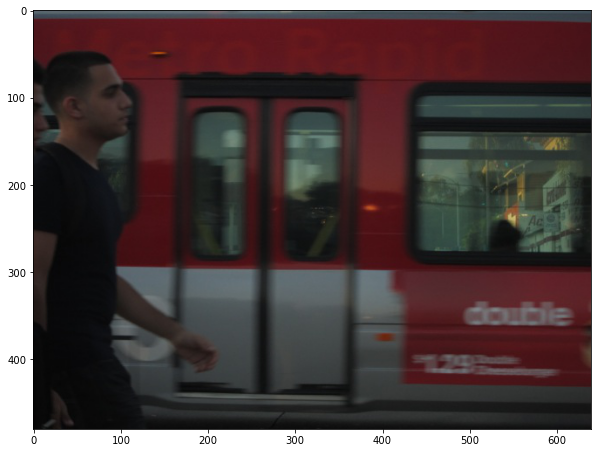

pass
pass
pass
pass
pass


  0%|          | 0/13 [00:00<?, ?it/s]

6


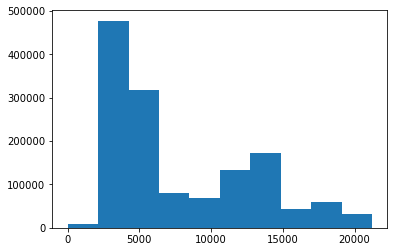

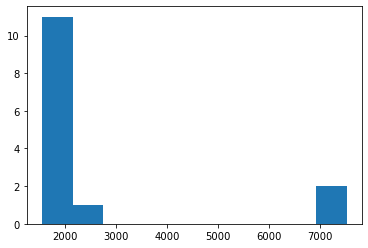

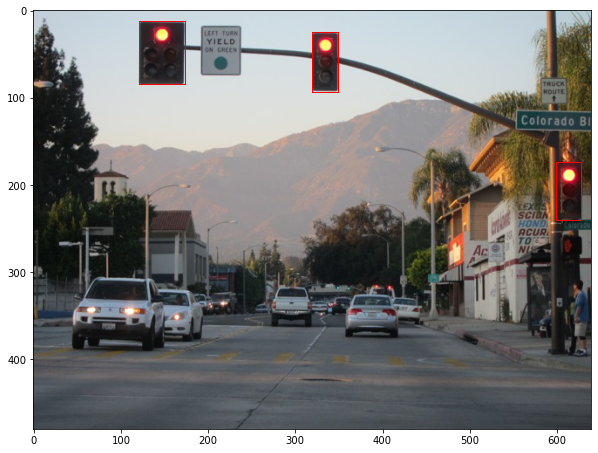

  0%|          | 0/13 [00:00<?, ?it/s]

0


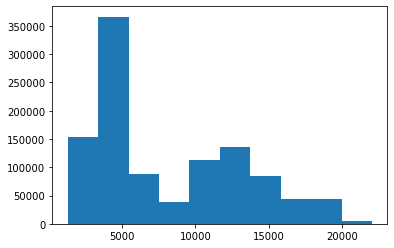

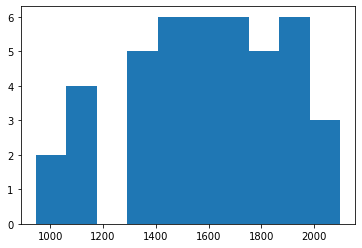

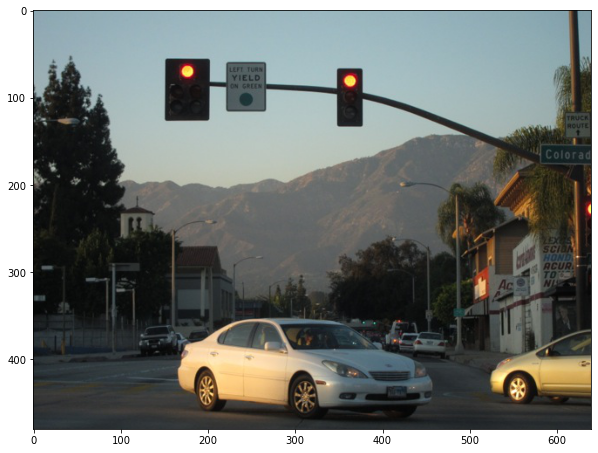

pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


  0%|          | 0/13 [00:00<?, ?it/s]

0


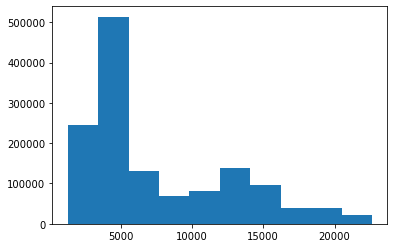

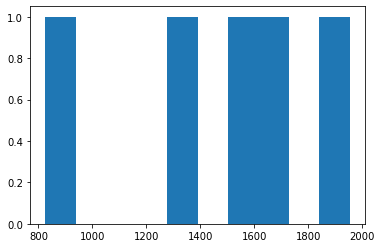

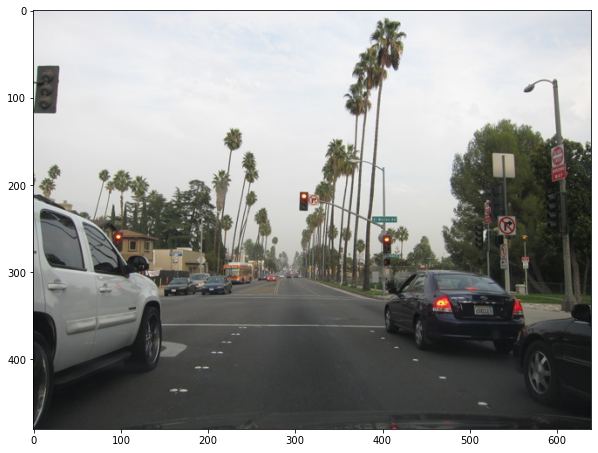

pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


In [9]:
preds = {}
for i in tqdm(range(len(file_names)), desc=('Images')):
    
    if i in [0, 1, 3, 9, 10, 31]:
        # read image using PIL:
        I = Image.open(os.path.join(data_path,file_names[i]))

        # convert to numpy array:
        I = np.asarray(I)

        preds[file_names[i]] = detect_red_light(I)
        show_img(I, preds[file_names[i]])
    else:
        print('pass')

## Ideas
- bottom half dark, set an absolute darkness threshold for bottom half
- top half bright, more red and less blue
- try larger reference image
- successfully performed edge detection: with top half light blue, bottom half dark blue :(
- only compare red channel
- set limit for number of bounding boxes
- raise distance threshold if 0 bounding boxes
- check surroundings so that border around the top half is the same as the border around the bottom half
- get rid of overlap if overlap is barely overlapping
- 1, 2, 31, 
